# Тестовое Леруа Мерлен

## 1.1 Нарисовать ER-диаграмму с базовыми атрибутами модели данных приложения по рабочим сменам для сотрудников магазина. Отметить ключевые атрибуты.

Прежде чем притсупить к построению ER-диаграммы, определим основные сущности и их связи между собой и их атрибуты. Они могут выглядеть следующим образом:

### Сущности и атрибуты:

1. Сотрудники (Employees)
   
    Атрибуты: employeeID (PK), name, position, department
2. Смены (Shifts)
   
   Атрибуты: shiftID (PK), employeeID (FK), shiftDate, startTime, endTime, area
   
3. Неявка (Absence)
   
   Атрибуты: absenceID (PK), employeeID (FK), absenceDate, reason

### Связи:

1. Сотрудник отрабатывает множество смен, но за каждой сменой определен один сотрудник (∞:1, Employees -> Shifts)

2. Сотрудник может иметь несколько неявок, но на отдельную неявку - один сотрудник (∞:1, Employees -> Absence)


### Диаграмма:

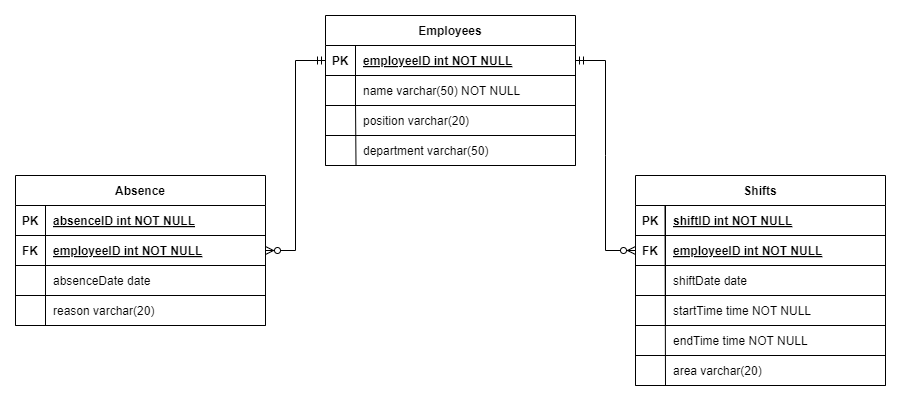

## 1.2 Напишите SQL-запросы по созданной модели для нахождения сотрудников:
1) Кто отработал больше всего часов за 2023 год?

2) Кто чаще всего отсутствовал на работе по причине прогула?

3) В какой зоне магазина (кассы, торговый зал, офисное помещение) сотрудники провели суммарно больше всего времени?

### 1.2.1 Кто отработал больше всего часов за 2023 год?

In [ ]:
SELECT e.employeeID, e.name, SUM(EXTRACT(EPOCH FROM (s.endTime - s.startTime)) / 3600) AS TtlHours
FROM Employees e
JOIN Shifts s ON e.employee_id = s.employee_id
WHERE EXTRACT(YEAR FROM s.shiftDate) = 2023
GROUP BY e.employeeID, e.name
ORDER BY TtlHours DESC
LIMIT 1;

### 1.2.2 Кто чаще всего отсутствовал на работе по причине прогула?

In [ ]:
SELECT e.employeeID, e.name, COUNT(a.absenceID) AS AbsenceCount
FROM Employee e
JOIN Absence a ON e.employee_id = a.employee_id
WHERE a.reason = 'Прогул'
GROUP BY e.employeeID, e.name
ORDER BY AbsenceCount DESC
LIMIT 1;

### 1.2.3 В какой зоне магазина (кассы, торговый зал, офисное помещение) сотрудники провели суммарно больше всего времени?

In [ ]:
SELECT area, SUM(EXTRACT(EPOCH FROM (endTime - startTime)) / 3600) AS TtlHours
FROM Shifts
GROUP BY area
ORDER BY TtlHours DESC
LIMIT 1;

## 2. На основании опросов выяснилось, что посетители магазина часто сетуют на нехватку консультантов в торговых залах. Какие метрики эффективности для директора магазина вы могли бы привести в качестве подспорья в этом вопросе?

### В качестве подспорья в решении данного вопроса могу привести следующие метрики эффективности:
#### 1. Среднее количество консультантов в торговом зале в час.

    С помощью данной метрики можно определить, в какое время и дни недели может возникнуть нехватка персонала.

#### 2. Среднее время отклика консультанта на вопрос клиента.

    Определим, с какой скоростью консультанты обслуживают клиентов.

#### 3. Соотношение количество консультантов к количеству клиентов.

    Данная метрика позволит оценить насколько рентабельно иметь в подчинении текущее количество консультантов.

#### 4. Время пребывание консультантов от всего времени работы в торговом зале.

    Определим нагрузку консультантов и оценим, возможна ли оптимизация их графика работы/насколько добросовестно они исполняют свои обязанности.

#### 5. Оценка удовлетворенности посетителей.

    Провести опрос среди посетителей (как очно, так и в приложении магазина) насколько клиент был удовлетворен работой консультантов.

#### 6. Среднее время, проведенное в торговом зале посетителем, и наличие им покупки товара.

    Оценить, как проведенное время в торговом зале и покупательская активность зависит от наличия консультанта.

#### 7. Количество несостоявшихся продаж из-за отсутствия консультанта в торговом зале.

    Определить, какие имеются убытки из-за недостаточного количества консультантов в торговом зале/недобросовестной работы персонала.

#### 8. Нагрузка консультантов.

    Определить, насколько равномерно распределена нагрузка среди персонала.

## 3. Есть API-сервис с данными https://opensky-network.org/api/states/all.

### 3.1. Придумать структуру реляционной базы под ответ этого сервиса (с примером ddl, любой тип реляционной СУБД).

Для начала посмотрим, как выглядит ответ OpenSky Network API. Получим примерно следующий JSON:

In [ ]:
{
  "time": 1458564121,
  "states": [
    [
      "3c6444",
      "DLH9LF  ",
      "Germany",
      1458564120, 1458564120, 6.1546, 50.1964, 9639.3, false, 232.88, 98.26, 4.55, null, 9547.86, "1000",
      false, 0]
  ]
}

На основе полученных данных и чтения документации, можно предлжить следующий вариант структуры РБД:

    Создадим 2 таблицы, в одной - информация о борте и полете, во второй - о траектории и местонахождении

Пример DDL:

In [ ]:
CREATE TABLE Flights (
    flight_id       SERIAL PRIMARY KEY,
    icao24          VARCHAR(20),
    callsign        VARCHAR(8),
    origin_country  VARCHAR(50)
);

CREATE TABLE Positions (
    position_id      SERIAL PRIMARY KEY,
    flight_id        INT REFERENCES Flights(flight_id),
    time             INT,
    time_position    INT,
    last_contact     INT,
    longitude        FLOAT,
    latitude         FLOAT,
    baro_altitude    FLOAT,
    on_ground        BOOLEAN,
    velocity         FLOAT,
    true_track       FLOAT,
    vertical_rate    FLOAT,
    sensors          VARCHAR(),
    geo_altitude     FLOAT,
    squawk           VARCHAR(4),
    spi              BOOLEAN,
    position_source  INT
);

### 3.2 Приведите пример, как бы сделали документацию по этому сервису для потенциального пользователя - вашего коллеги - аналитика данных.

#### Документация API-сервиса OpenSkyNetwork

##### URL:

https://opensky-network.org/api/states/all

##### Описание:

Данный API-сервис позволяет получить информацию о полетах и воздушном пространстве в некоммерческих целях.

Следует заметить, что такую информацию, как расписание аэропортов, задержки рейсов и пр. данный сервис не предоставляет!

##### Метод:

GET

##### Пример запроса:

GET https://opensky-network.org/api/states/all

##### Формат ответа:

In [ ]:
{
  "time": 1458564121,
  "states": [
    [
      "3c6444",
      "DLH9LF",
      "Germany",
      1458564120, 1458564120, 6.1546, 50.1964, 9639.3, false, 232.88, 98.26, 4.55, null, 9547.86, "1000",
      false, 0]
  ]
}

##### Описание полей ответа:

    time: int - Время запроса в формате Unix Time.
    
    states: list - Массив с информацией о каждом воздушном судне или None, если никакой информации о состоянии воздушного пространства нет.

##### Описание полей каждого элемента массива "states" [StateVector]

    icao24: str - Уникальный 24-битный адрес ICAO.

    callsign: str - Позывной воздушного судна. None, если позывной не назначен.

    origin_country: str - Страна воздушного судна. Определяется по адресу ICAO24.

    time_position: int - Unix-время последнего известного положения. None, если отчета о местоположении не было за прошедшие 15 секунд.

    last_contact: int - Unix-время с момента последнего полученного сообщения от летательного аппарата.

    longitude: float - Долгота воздушного судна.
    
    latitude: float - Широта воздушного судна.
    
    baro_altitude: float - Барометрическая высота воздушного судна. Может быть None.
    
    on_ground: bool - Если воздушное судно на земле - True.
    
    velocity: float - Скорость относительно земли. None, если информация отсутствует.
    
    true_track: float - Истинный курс относительно земли в десятичных градусах.
    
    vertical_rate: float - Вертикальная скорость в м/с. None, если информация отсутствует.
    
    sensors: list[int] - Серийные номера датчиков. None, если информация о них не запрашивалась.
    
    geo_altitude: float - Геометрическая высота.
    
    squawk: str - Код транспондера (Squawk). Может быть None.
    
    spi: bool - Индикатор специального положения.
    
    position_source: int - Источник информации о положении.

##### Примечание для аналитиков:

1. Обращайте внимание на нулевые значения (особенно поля icao24, velocity, vertical_rate).

2. Проверяйте полученные данные о долготе и широте на допустимые значения (-180 <= longitude <= 180, -90 <= latitude <= 90).

3. Проверяйте данные о last_contact и time_position на актуальность.

3. При необходимости вести обработку данных в режиме реального времени рекомендуется использование индекса для поля icao24.

### 3.3. (bonus task) Какие бы проверки к получаемым в ответе данным вы бы применили, чтобы оценить их качество? Попробуйте реализовать одну из таких проверок средствами python.

Некоторые из возможных проверок качества данных перечислены в примечании п.3.2.

Пример проверки долготы и широты на допустимые значения:

In [ ]:
import requests

# получим данные по API
response = requests.get("https://opensky-network.org/api/states/all")
data = response.json()

# Извлекаем StateVectors (Векторы состояния) в массив.
states = data.get('states', [])

# функция для проверки долготы и широты на допустимые значения. 5, 6- индексы необходимых полей для проверки. 0 - для кода воздушного судна.
def check_long_lat(states):
    for state in states:
        icao24 = state[0] 
        longitude = state[5]
        latitude = state[6]
        if longitude is not None and (longitude > 180 or longitude < -180):
            print(f"Недопустимое значение долготы {longitude} для борта {icao24}")
        if latitude is not None and (latitude > 90 or latitude < -90):
            print(f"Недопустимое значение широты {latitude} для борта {icao24}")

# Запуск проверки
check_long_lat(data['states'])